# Exercise - Duration

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

## 1 Stylized Duration and Convexity

Consider a bond issued today, with
* 10 years to maturity
* coupon rate of 3%
* yield to maturity (semiannual) is 5\%

### 1.1.

Calculate duration as given in the formula.

### 1.2.
Re-calculate the duration but now assuming the coupon is 7%. (Leave the other parameters the same.)

### 1.3.
Re-calculate the duration but now assuming the coupon is 5%. (Leave the other parameters the same.)

### 1.4.
Compare the answers. How does coupon rate impact duration. Explain.

In [1]:
import numpy as np

def macaulay_duration(coupon_rate):
    y = 0.05
    m = 2
    n = 20
    y_m = y / m
    C = coupon_rate / m
    F = 1

    i = np.arange(1, n+1)
    T = i / m

    cashflows = np.full(n, C)
    cashflows[-1] += F

    discount = (1 + y_m) ** (-i)
    PV = cashflows * discount
    P = PV.sum()

    weights = PV / P
    D = np.sum(weights * T)

    return D

print("Coupon 3%:", macaulay_duration(0.03))
print("Coupon 7%:", macaulay_duration(0.07))
print("Coupon 5%:", macaulay_duration(0.05))


Coupon 3%: 8.570879486771778
Coupon 7%: 7.564844312053696
Coupon 5%: 7.989445671393991


### 1.4. Effect of Coupon Rate on Duration

From the calculations:

- **3% coupon:**
  $$
  D \approx 8.57 \text{ years}
  $$

- **5% coupon:**
  $$
  D \approx 7.99 \text{ years}
  $$

- **7% coupon:**
  $$
  D \approx 7.56 \text{ years}
  $$

Holding maturity and yield fixed, duration decreases as the coupon rate increases.

**Explanation:**
Macaulay duration is the present-value-weighted average time of the bond’s cash flows. A higher coupon increases the size of earlier coupon payments, shifting more present value to earlier dates and reducing the weighted average time. Conversely, a lower coupon concentrates more present value in the final principal payment, increasing duration.


***

# 2 Hedging Duration

Use data from `treasury_ts_duration_2025-05-30.xlsx`.

The file contains time-series information on two treasuries. 

In [2]:
import pandas as pd

In [3]:
filepath = 'treasury_ts_duration_2025-05-30.xlsx'

data = pd.read_excel(filepath,sheet_name='database')
data_info =  data.drop_duplicates(subset='KYTREASNO', keep='first').set_index('KYTREASNO')
data_info[['type','issue date','maturity date','cpn rate']]

,type,issue date,maturity date,cpn rate
KYTREASNO,,,,
207391,note,2019-08-15,2029-08-15,1.625
207392,bond,2019-08-15,2049-08-15,2.250


You will largely focus on the sheets which give the timeseries of prices and durations for each of the two securities, as shown in the following code.

In [4]:
SHEET_CLEAN = 'clean price'
SHEET_DIRTY = 'dirty price'
SHEET_DURATION = 'duration'
INDEX_NAME = 'quote date'

clean = pd.read_excel(filepath,sheet_name=SHEET_CLEAN).set_index(INDEX_NAME)
dirty = pd.read_excel(filepath,sheet_name=SHEET_DIRTY).set_index(INDEX_NAME)
duration = pd.read_excel(filepath,sheet_name=SHEET_DURATION).set_index(INDEX_NAME)

Set prices to clean or dirty...

We will be using dirty prices so I have set USE_CLEAN to false

In [5]:
USE_CLEAN = False

if USE_CLEAN:
    price = clean
else:
    price = dirty

In [6]:
display(price)

,207391,207392
quote date,,
2019-08-09,98.882812,99.789062
2019-08-12,99.796875,102.554688
2019-08-13,99.281250,101.867188
2019-08-14,100.406250,105.179688
2019-08-15,100.882812,106.234375
...,...,...
2025-05-23,91.340125,60.550954
2025-05-27,91.488540,61.498856
2025-05-28,91.368029,61.176947


Duration...

In [7]:
display(duration)

,207391,207392
quote date,,
2019-08-09,9.289497,22.000102
2019-08-12,9.285468,22.118496
2019-08-13,9.280314,22.084308
2019-08-14,9.282750,22.228549
2019-08-15,9.282163,22.270910
...,...,...
2025-05-23,4.081232,16.706728
2025-05-27,4.070393,16.764143
2025-05-28,4.067509,16.736880


### 2.1.

Suppose you have a portfolio of `10,000` USD long in security `207391` on the first day of the sample.

If you want to manage interest rate exposure using duration, how large of a short position should you hold in `207392`?



In [17]:
price.columns = price.columns.astype(str)
duration.columns = duration.columns.astype(str)
duration.columns


Index(['207391', '207392'], dtype='object')

In [20]:
first_date = price.index.min()

D_long  = duration.loc[first_date, '207391']
D_hedge = duration.loc[first_date, '207392']


V_long = 10_000

# Dollar value of short hedge (duration-neutral)
V_short = V_long * D_long / D_hedge

V_short


np.float64(4222.479082922904)

In [21]:
P_hedge = price.loc[first_date, '207392']
N_short = V_short / P_hedge
N_short


np.float64(42.31404702216642)

To hedge the interest rate exposure of a \$10,000 long position in security 207391, we form a duration-neutral portfolio using security 207392.

Using first-day durations and dirty prices, the required short position is:
$$
V_{\text{short}} = \$4{,}222.48
$$

This corresponds to:
$$
42.31 \text{ units of security 207392}
$$

The resulting portfolio has zero net dollar duration and is therefore hedged against small parallel shifts in interest rates.


### 2.2.

Step through the time-series, doing the following:

* Starting at the end of the first day, set the hedged position according to the relative given durations.
* Use the second day's price data to evaluate the net profit or loss of the hedged position.
* Reset the the hedged position using the end-of-second-day durations. Again fix the long position of security `207391` to be `10,000`.
* Repeat throughout the timeseries.

Calculate the daily profit and loss (PnL) for the
* dynamically hedged position constructed above.
* long-only position, (still at `10,000` throughout.)

(You might check to verify that the net duration is zero at all dates.)

Report...
* the cumulative PnL of both strategies via a plot.
* the (daily) mean, standard deviation, min, and max of the PnL in a table.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dates = price.index
V_long = 10_000

pnl_hedged = []
pnl_long_only = []

for t in range(len(dates) - 1):
    date_t = dates[t]
    date_tp1 = dates[t + 1]

    # Prices
    P1_t  = price.loc[date_t, '207391']
    P1_tp1 = price.loc[date_tp1, '207391']
    P2_t  = price.loc[date_t, '207392']
    P2_tp1 = price.loc[date_tp1, '207392']

    # Durations (end of day t)
    D1 = duration.loc[date_t, '207391']
    D2 = duration.loc[date_t, '207392']

    # Hedge size (USD)
    V_short = V_long * D1 / D2

    # Units held
    N1 = V_long / P1_t
    N2 = V_short / P2_t

    # PnL
    pnl_long = N1 * (P1_tp1 - P1_t)
    pnl_hedge = pnl_long - N2 * (P2_tp1 - P2_t)

    pnl_long_only.append(pnl_long)
    pnl_hedged.append(pnl_hedge)

pnl_long_only = pd.Series(pnl_long_only, index=dates[1:])
pnl_hedged = pd.Series(pnl_hedged, index=dates[1:])


In [23]:
net_duration = (
    V_long * duration['207391']
    - (V_long * duration['207391'] / duration['207392']) * duration['207392']
)

net_duration.abs().max()


np.float64(1.4551915228366852e-11)

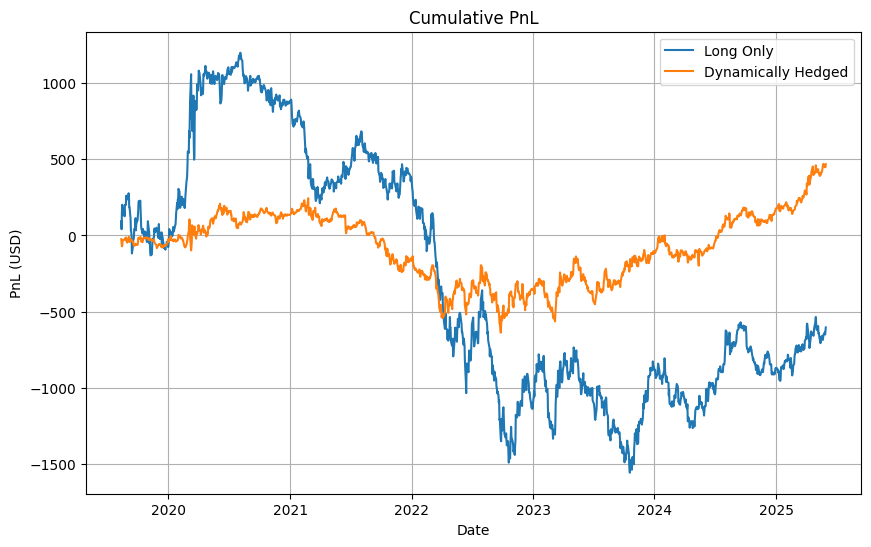

In [24]:
plt.figure(figsize=(10,6))
plt.plot(pnl_long_only.cumsum(), label='Long Only')
plt.plot(pnl_hedged.cumsum(), label='Dynamically Hedged')
plt.legend()
plt.title('Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('PnL (USD)')
plt.grid(True)
plt.show()


In [25]:
summary = pd.DataFrame({
    'Long Only': pnl_long_only,
    'Hedged': pnl_hedged
}).agg(['mean', 'std', 'min', 'max'])

summary


,Long Only,Hedged
mean,-0.415634,0.321778
std,43.923096,21.048403
min,-320.393060,-98.005997
max,276.310137,118.041636


### 2.2. PnL Summary Statistics

The table above reports daily PnL statistics for the long-only position and the dynamically duration-hedged position.



**Interpretation:**
The dynamically hedged strategy substantially reduces interest rate risk, as evidenced by the much lower standard deviation and smaller extreme losses compared to the long-only position. While the long-only strategy exhibits higher volatility and larger tail outcomes, the duration-hedged portfolio delivers a more stable PnL profile, consistent with effective first-order interest rate risk neutralization.


### 2.3.

Give two reasons that the daily PnL is not always zero for the hedged position given that we have hedged the duration.

1. **Convexity differences:**
   Duration hedging only matches first-order sensitivity to interest rates. The two securities generally have different convexities, so for non-infinitesimal yield changes the longer-maturity bond experiences price changes that are not fully offset by the hedge.

2. **Imperfect replication of interest rate exposure:**
   Duration neutralization assumes identical responses to changes in the yield curve. In practice, the hedge security does not perfectly replicate the rate sensitivity of the long position, particularly when yield curve movements are non-parallel, leading to residual PnL.



### 2.4.
The PnL above doesn't account for the coupons.

Calculate a dataframe indexed by dates with columns for the two treasuries with values of coupon payments.
* Recall that the stated coupon rate is semiannual, so at any give coupon date, it pays half the stated rate.
* Figure out the coupon dates by using the `data` tab and looking for dates where `acc int` goes down. Recall that accrued interest measures the portion of the coupon period that has passed. So when this resets, it is because the coupon has been paid.

Report the first 5 dates that a coupon is paid (by either bond).


In [40]:
data = data.sort_values(['KYTREASNO', 'quote date'])

data['coupon_paid'] = (
    data
    .groupby('KYTREASNO')['accrued int']
    .diff()
    .lt(0)
)
data['coupon_amount'] = 0.0
data.loc[data['coupon_paid'], 'coupon_amount'] = (
    0.5 * data.loc[data['coupon_paid'], 'cpn rate']
)
coupon_df = (
    data
    .pivot(index='quote date', columns='KYTREASNO', values='coupon_amount')
    .fillna(0.0)
)
coupon_df[(coupon_df != 0).any(axis=1)].head(5)



KYTREASNO,207391,207392
quote date,,
2020-02-18,0.8125,1.125
2020-08-17,0.8125,1.125
2021-02-16,0.8125,1.125
2021-08-16,0.8125,1.125
2022-02-15,0.8125,1.125


### 2.4. Coupon Payment Dates

Coupon payment dates are identified by drops in accrued interest, which reset when a semiannual coupon is paid. The table below reports the first five dates on which a coupon is paid by either Treasury, along with the corresponding coupon amounts.

- Security 207391 pays .8125 per coupon date
- Security 207392 pays 1.1250 per coupon date

These payments reflect half of the stated annual coupon rate, consistent with semiannual coupon conventions.


### 2.5.
Account for the coupons in the PnL calculations of `2.2`. Report the updated PnL in a plot and a table, similar to the reporting in `2.2`.

In [41]:
coupon_df.columns = coupon_df.columns.astype(str)
coupon_aligned = coupon_df.loc[pnl_long_only.index]
coupon_pnl_long_only = (
    coupon_aligned['207391']
    * (10_000 / price['207391'].loc[coupon_aligned.index])
)
coupon_pnl_hedged = []

dates = coupon_aligned.index

for date in dates:
    # prices and durations at date
    P1 = price.loc[date, '207391']
    P2 = price.loc[date, '207392']

    D1 = duration.loc[date, '207391']
    D2 = duration.loc[date, '207392']

    # hedge size
    V_short = 10_000 * D1 / D2

    # units
    N1 = 10_000 / P1
    N2 = V_short / P2

    # coupon cashflows
    cpn = (
        N1 * coupon_aligned.loc[date, '207391']
        - N2 * coupon_aligned.loc[date, '207392']
    )

    coupon_pnl_hedged.append(cpn)

coupon_pnl_hedged = pd.Series(coupon_pnl_hedged, index=dates)
total_pnl_long_only = pnl_long_only + coupon_pnl_long_only
total_pnl_hedged = pnl_hedged + coupon_pnl_hedged


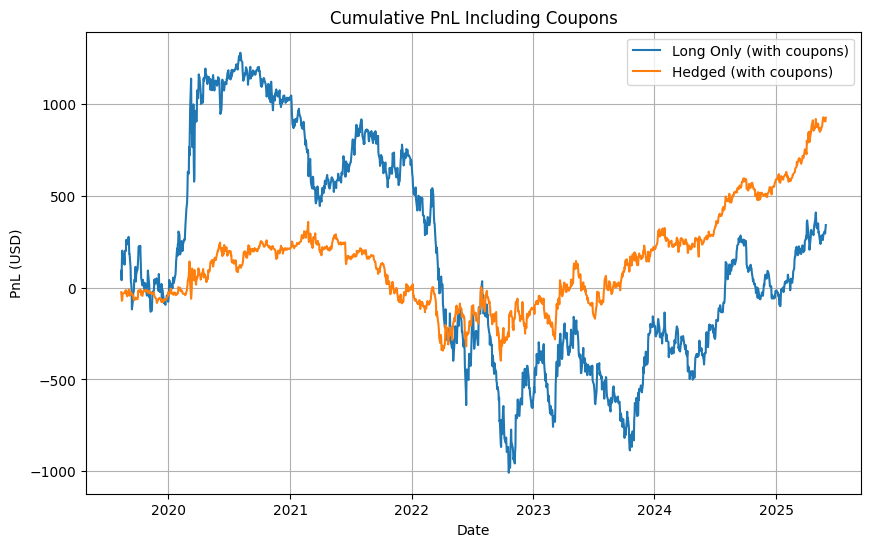

In [42]:
plt.figure(figsize=(10,6))
plt.plot(total_pnl_long_only.cumsum(), label='Long Only (with coupons)')
plt.plot(total_pnl_hedged.cumsum(), label='Hedged (with coupons)')
plt.legend()
plt.title('Cumulative PnL Including Coupons')
plt.xlabel('Date')
plt.ylabel('PnL (USD)')
plt.grid(True)
plt.show()


In [43]:
summary_with_coupons = pd.DataFrame({
    'Long Only (with coupons)': total_pnl_long_only,
    'Hedged (with coupons)': total_pnl_hedged
}).agg(['mean', 'std', 'min', 'max'])

summary_with_coupons


,Long Only (with coupons),Hedged (with coupons)
mean,0.234918,0.637452
std,43.097448,20.770464
min,-320.393060,-98.005997
max,276.310137,118.041636


### 2.5. Effect of Including Coupons

Compared to the price-only PnL in 2.2, incorporating coupon cashflows shifts the average PnL upward for both strategies. Coupon payments introduce a positive carry component that accumulates over time, particularly for the dynamically hedged portfolio where interest rate risk has been largely neutralized.

While the long-only strategy continues to exhibit large swings due to interest rate movements, the hedged strategy displays a smoother cumulative PnL with substantially lower volatility. This highlights that duration hedging reduces price risk while allowing the investor to retain the coupon income of the bonds.
